In [48]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [25]:
from google.colab import files
file_handle = files.upload()

Saving SkillCraft.csv to SkillCraft.csv


In [28]:
data= pd.read_csv("SkillCraft.csv")

In [29]:

data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


In [30]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                19 non-null     int64  
 1   LeagueIndex           19 non-null     int64  
 2   Age                   19 non-null     int64  
 3   HoursPerWeek          19 non-null     int64  
 4   TotalHours            19 non-null     int64  
 5   APM                   19 non-null     float64
 6   SelectByHotkeys       19 non-null     float64
 7   AssignToHotkeys       19 non-null     float64
 8   UniqueHotkeys         19 non-null     int64  
 9   MinimapAttacks        19 non-null     float64
 10  MinimapRightClicks    19 non-null     float64
 11  NumberOfPACs          19 non-null     float64
 12  GapBetweenPACs        19 non-null     float64
 13  ActionLatency         19 non-null     float64
 14  ActionsInPAC          19 non-null     float64
 15  TotalMapExplored      19 

In [31]:
data.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,80.578947,3.947368,22.578947,14.210526,2075.157895,112.241274,0.002828,0.000354,3.736842,0.000152,0.000410,0.003600,42.986126,61.185216,5.056426,22.631579,0.001215,6.578947,0.000044,0.000150
std,21.404350,1.352926,6.344865,9.330827,2679.261284,46.141467,0.002365,0.000186,2.232142,0.000308,0.000374,0.001070,19.272466,17.718979,1.525458,7.689896,0.000630,1.502435,0.000085,0.000165
min,52.000000,1.000000,16.000000,4.000000,70.000000,44.457000,0.000379,0.000052,1.000000,0.000000,0.000000,0.001988,22.688500,37.794700,3.096500,13.000000,0.000372,4.000000,0.000000,0.000000
25%,59.000000,3.000000,17.500000,9.000000,295.000000,74.628000,0.001006,0.000221,2.000000,0.000000,0.000146,0.002807,28.791950,46.660500,4.164300,16.000000,0.000747,6.000000,0.000000,0.000000
50%,81.000000,4.000000,20.000000,10.000000,800.000000,117.488400,0.002333,0.000319,4.000000,0.000019,0.000399,0.003555,39.638100,62.081300,4.750800,22.000000,0.001194,6.000000,0.000000,0.000102
75%,99.000000,5.000000,27.000000,16.000000,2854.000000,148.759500,0.003885,0.000478,5.500000,0.000098,0.000464,0.004439,48.902100,73.339950,5.832700,27.500000,0.001445,7.000000,0.000044,0.000256
max,118.000000,7.000000,38.000000,42.000000,10000.000000,212.602200,0.009040,0.000706,8.000000,0.001164,0.001329,0.005535,94.022700,98.771900,9.374000,45.000000,0.002768,10.000000,0.000273,0.000470


In [32]:
data.corr()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.256265,-0.269731,0.034405,-0.102949,0.017980,0.224451,0.328887,-0.082681,-0.093178,-0.317022,0.032393,0.046883,0.022396,-0.126828,0.020607,0.355776,0.491714,0.317710,0.029278
LeagueIndex,0.256265,1.000000,-0.306904,0.573033,0.581407,0.652057,0.691731,0.655163,0.344689,0.622008,0.351851,0.671732,-0.528994,-0.671667,0.087521,0.718919,0.656428,0.535115,0.365491,0.144283
Age,-0.269731,-0.306904,1.000000,-0.597115,-0.341227,-0.316465,-0.265301,-0.578639,-0.271078,-0.223047,-0.130918,-0.391124,0.127823,0.420306,0.096494,-0.369997,-0.270488,-0.584934,-0.293833,-0.182524
HoursPerWeek,0.034405,0.573033,-0.597115,1.000000,0.704940,0.698902,0.663731,0.565150,0.226868,0.794153,0.559593,0.438329,-0.420418,-0.506957,0.342800,0.719654,0.486161,0.410889,0.141337,0.065306
TotalHours,-0.102949,0.581407,-0.341227,0.704940,1.000000,0.682344,0.556760,0.292831,0.155782,0.779979,0.556432,0.511928,-0.409340,-0.559322,0.297910,0.678626,0.503907,0.222355,0.099908,0.039839
APM,0.017980,0.652057,-0.316465,0.698902,0.682344,1.000000,0.740963,0.545507,0.452461,0.581607,0.587105,0.731565,-0.680324,-0.829125,0.594321,0.840995,0.832821,0.412042,0.198699,-0.191265
SelectByHotkeys,0.224451,0.691731,-0.265301,0.663731,0.556760,0.740963,1.000000,0.647400,0.487647,0.616961,0.343004,0.469194,-0.181903,-0.412307,0.279631,0.836042,0.675554,0.456357,0.427942,-0.249734
AssignToHotkeys,0.328887,0.655163,-0.578639,0.565150,0.292831,0.545507,0.647400,1.000000,0.477667,0.346222,0.368058,0.529128,-0.221469,-0.451587,0.096572,0.685472,0.603732,0.709373,0.655547,-0.029685
UniqueHotkeys,-0.082681,0.344689,-0.271078,0.226868,0.155782,0.452461,0.487647,0.477667,1.000000,0.118381,0.075476,0.326497,-0.098625,-0.339704,0.137757,0.511889,0.492393,0.279873,0.095747,-0.458085
MinimapAttacks,-0.093178,0.622008,-0.223047,0.794153,0.779979,0.581607,0.616961,0.346222,0.118381,1.000000,0.460920,0.403905,-0.279202,-0.365604,0.205520,0.701968,0.474641,0.283341,0.070190,0.022440


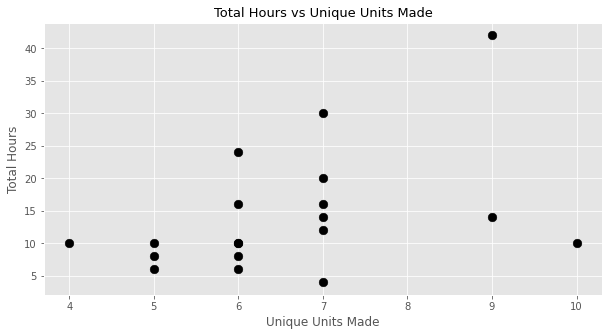

In [33]:
# Plotting the distribution of Data
plt.figure(figsize=(10,5))
plt.title('Total Hours vs Unique Units Made', fontsize=13)
plt.xlabel('Unique Units Made', fontsize=12)
plt.ylabel('Total Hours', fontsize=12)
plt.scatter(data.UniqueUnitsMade, data.HoursPerWeek, s=75, color='black')
plt.show()

In [34]:
#Training
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [35]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [36]:

print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (17, 19)
X_test: (2, 19)
y_train: (17,)
y_test: (2,)


In [37]:
# Modeling & Fitting 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(f'Coefficients: {model.coef_}')
print(f'Intercepts: {model.intercept_}')

Coefficients: [-3.78592202e-06  3.07796711e-05  3.11320602e-05  5.51506796e-05
  2.61361237e-08 -3.85790326e-05  1.17898352e-01 -2.79138353e-01
 -1.82357516e-06 -4.28936653e-01 -8.07987531e-01  6.18840848e-01
 -9.48936253e-08 -1.36705851e-05  5.62035509e-04  2.05260069e-05
  1.66278765e-03  1.43207554e-04  2.15335337e-01]
Intercepts: -0.002404661228017241


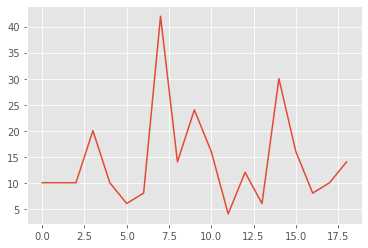

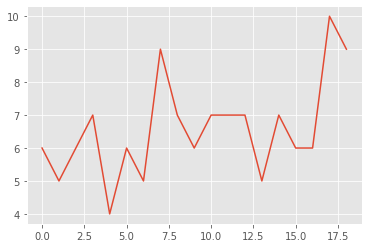

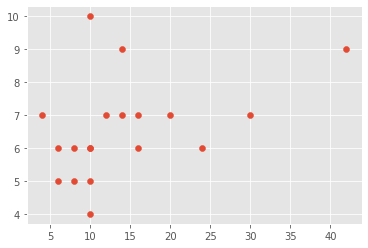

In [45]:

plt.plot(data["HoursPerWeek"])
plt.show()

plt.plot(data["UniqueUnitsMade"])
plt.show()

plt.scatter(data["HoursPerWeek"], data["UniqueUnitsMade"])
plt.show()


In [51]:

x = np.array(data["HoursPerWeek"]).reshape(-1, 1)
y = np.array(data["UniqueUnitsMade"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
reg = lr()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

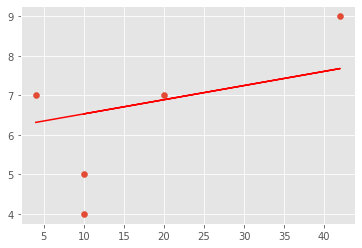

In [52]:

y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color ='red')

plt.show()